# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
#!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

temperature = []
humidity = []
wind_speed = []
clouds = []
country = []
date = []
lat = []
lng = []
city_name = []
record = 0

for city in cities:
    city_url = url + "&q=" + city
    record +=1
    print("processing record " + str(record))
  
    
    try:
        results = requests.get (city_url).json()
        #print(results)
        temperature.append(results["main"]["temp_max"])
        humidity.append(results["main"]["humidity"])
        wind_speed.append(results["wind"]["speed"])
        clouds.append(results["clouds"]["all"])
        country.append(results["sys"]["country"])
        date.append(results["dt"])
        lat.append(results["coord"]["lat"])
        lng.append(results["coord"]["lon"])
        city_name.append(city)
        
    except:
        print("could not find " + city)

processing record 1
processing record 2
processing record 3
processing record 4
processing record 5
processing record 6
processing record 7
processing record 8
processing record 9
processing record 10
processing record 11
processing record 12
processing record 13
processing record 14
processing record 15
processing record 16
processing record 17
processing record 18
processing record 19
processing record 20
processing record 21
could not find nizhneyansk
processing record 22
processing record 23
processing record 24
could not find yuzhno-yeniseyskiy
processing record 25
processing record 26
processing record 27
processing record 28
processing record 29
processing record 30
processing record 31
processing record 32
processing record 33
processing record 34
processing record 35
processing record 36
processing record 37
processing record 38
processing record 39
processing record 40
processing record 41
processing record 42
processing record 43
processing record 44
processing record 45
pro

processing record 348
processing record 349
processing record 350
processing record 351
processing record 352
processing record 353
could not find sindand
processing record 354
processing record 355
processing record 356
processing record 357
processing record 358
processing record 359
processing record 360
processing record 361
processing record 362
processing record 363
processing record 364
processing record 365
processing record 366
processing record 367
could not find babanusah
processing record 368
processing record 369
could not find sentyabrskiy
processing record 370
processing record 371
processing record 372
processing record 373
processing record 374
processing record 375
processing record 376
processing record 377
processing record 378
processing record 379
processing record 380
processing record 381
processing record 382
processing record 383
processing record 384
processing record 385
processing record 386
processing record 387
processing record 388
processing record 389


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
city_df = pd.DataFrame({"City": city_name,
                       "Lat": lat,
                       "Lng": lng,
                       "Max Temp": temperature,
                       "Humidity": humidity,
                       "Cloudiness": clouds,
                       "Wind Speed": wind_speed,
                       "Country": country,
                       "Date": date})


city_df.to_csv(output_data_file)
city_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,concepcion del oro,24.63,-101.42,53.71,45,0,6.82,MX,1604282335
1,douglas,41.30,-96.17,39.99,51,1,4.54,US,1604282335
2,nevers,46.92,3.33,63.00,83,100,4.83,FR,1604282336
3,nokaneng,-19.67,22.27,71.20,36,17,5.88,BW,1604282336
4,nova olimpia,-14.80,-57.29,75.29,66,93,1.97,BR,1604282086
...,...,...,...,...,...,...,...,...,...
545,martapura,-3.42,114.85,75.94,94,100,1.36,ID,1604282499
546,mahibadhoo,3.78,72.97,82.40,71,0,5.55,MV,1604282499
547,muli,2.92,73.57,82.26,71,21,4.79,MV,1604282500
548,poya,-21.35,165.15,82.72,58,99,4.81,NC,1604282500


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
city_df.describe()
#the maximum humidity is 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.584873,19.825800,58.293673,72.945455,52.232727,8.271236,1.604282e+09
std,33.048822,90.283975,21.824450,19.996647,40.965404,6.240469,9.948129e+01
min,-54.800000,-175.200000,-14.550000,1.000000,0.000000,0.250000,1.604282e+09
25%,-7.300000,-63.215000,44.035000,63.000000,2.000000,3.717500,1.604282e+09
50%,21.355000,27.060000,63.760000,78.000000,57.500000,6.710000,1.604282e+09
75%,46.900000,100.097500,76.337500,87.000000,95.000000,11.410000,1.604282e+09
max,78.220000,178.420000,90.180000,100.000000,100.000000,47.200000,1.604282e+09


In [25]:
#  Get the indices of cities that have humidity over 100%.
drop_list = city_df.index[city_df["Humidity"]>100].tolist()
drop_list

[]

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df = city_df.drop(drop_list)
city_df = city_df.reset_index(drop=True)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,concepcion del oro,24.63,-101.42,53.71,45,0,6.82,MX,1604282335
1,douglas,41.30,-96.17,39.99,51,1,4.54,US,1604282335
2,nevers,46.92,3.33,63.00,83,100,4.83,FR,1604282336
3,nokaneng,-19.67,22.27,71.20,36,17,5.88,BW,1604282336
4,nova olimpia,-14.80,-57.29,75.29,66,93,1.97,BR,1604282086
...,...,...,...,...,...,...,...,...,...
545,martapura,-3.42,114.85,75.94,94,100,1.36,ID,1604282499
546,mahibadhoo,3.78,72.97,82.40,71,0,5.55,MV,1604282499
547,muli,2.92,73.57,82.26,71,21,4.79,MV,1604282500
548,poya,-21.35,165.15,82.72,58,99,4.81,NC,1604282500


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

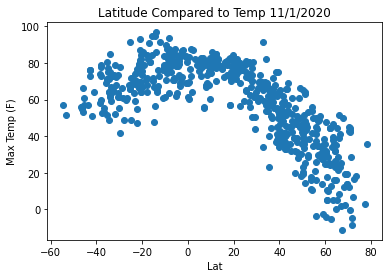

In [8]:
# Generate a scatter plot of Latitude vs. Temperature

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Latitude Compared to Temp 11/1/2020")
plt.savefig("Images/lat-temp-scatter.png")
plt.show()

When looking at the overall temperature compared to latitude it makes sense that the further north you travel in November, the colder it gets. It also makes sense that as you travel south it gets warmer as it is nearing summer in the souther hemisphere.

## Latitude vs. Humidity Plot

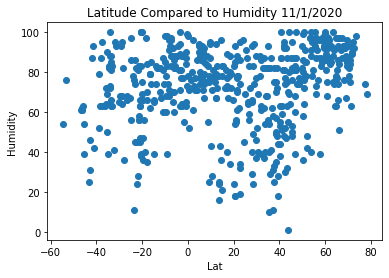

In [27]:
# Generate a scatter plot of Latitude vs. Humidity

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude Compared to Humidity 11/1/2020")
plt.savefig("Images/lat-hum-scatter.png")
plt.show()

When looking at the overall humidity compared to latitude it makes sense that there is a large number of places with relatively high humidity. Since this time of year is a transitional weather time across most of the globe it would stand to reason there would be higher humidity. 

## Latitude vs. Cloudiness Plot

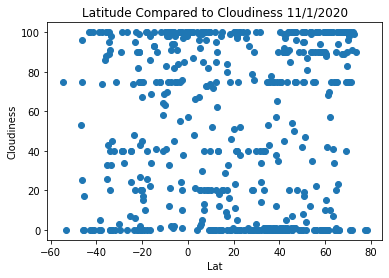

In [28]:
# Generate a scatter plot of Latitude vs. Cloudiness

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude Compared to Cloudiness 11/1/2020")
plt.savefig("Images/lat-cloud-scatter.png")
plt.show()

When looking at the overall cloudiness compared to latitude its interesting that there are distinct lines in certain areas no matter the latitude. There is a large amount with 100% cloud cover and 0% cloud cover. 

## Latitude vs. Wind Speed Plot

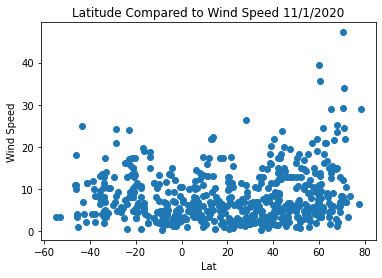

In [29]:
# Generate a scatter plot of Latitude vs. Wind Speed

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude Compared to Wind Speed 11/1/2020")
plt.savefig("Images/lat-wind-scatter.png")
plt.show()

When looking at the overall wind speed compared to latitude it makes sense that the wind speed is generally low. Closer to the north pole there is some more instability and if you were to look at other weather for the northern Canada you see that the weather is very active and cold. For example in Hammerfest, Norway there are wind gusts of 47 MPH.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

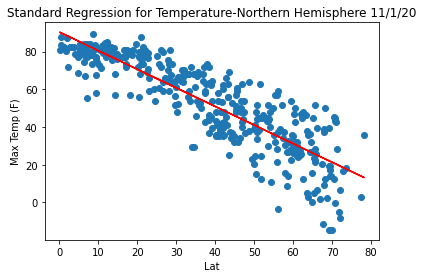

In [30]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")


# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Standard Regression for Temperature-Northern Hemisphere 11/1/20")
plt.savefig("Images/lat-temp-lin-reg-north.png")
plt.show()

When looking at northern temperatures compared to latitude it makes sense that the further north you travel in November, the colder it gets. For this reason it is reasonable that the line of regression would have a downward slope.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

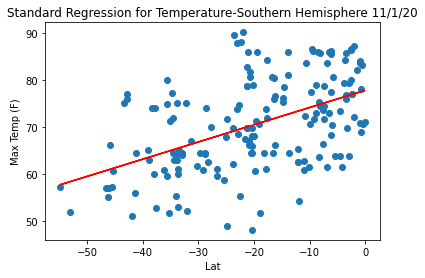

In [31]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")


# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Standard Regression for Temperature-Southern Hemisphere 11/1/20")
plt.savefig("Images/lat-temp-lin-reg-south.png")
plt.show()

Similarly when looking at southern temperatures compared to latitude it makes sense that the closer to the equator you travel in November, the warmer it gets. For this reason it is reasonable that the line of regression would have a upward slope. It also makes sense that the line is not as steep as the northern line since there is also more variability in the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

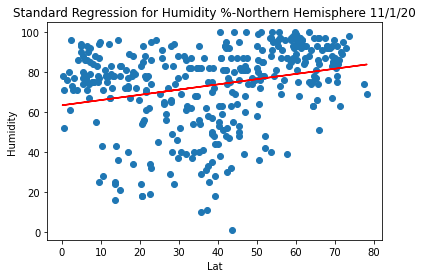

In [32]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Humidity"])
plt.xlabel("Lat")
plt.ylabel("Humidity")


# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Standard Regression for Humidity %-Northern Hemisphere 11/1/20")
plt.savefig("Images/lat-hum-lin-reg-north.png")
plt.show()

When looking at northern hemisphere humidity compared to latitude it makes sense that generally the northern portion of the world is more humid. As most days start with fog and many places are starting to see snow. It also makes sense that there is a gentle slope up since much of the humidity occurs in more northern locations.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

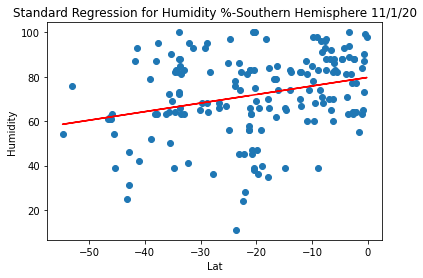

In [33]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Humidity"])
plt.xlabel("Lat")
plt.ylabel("Humidity")

# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Standard Regression for Humidity %-Southern Hemisphere 11/1/20")
plt.savefig("Images/lat-hum-lin-reg-south.png")
plt.show()

When looking at southern hemisphere humidity compared to latitude it makes sense that generally the northern portion of the hhemisphere is more humid. It also makes sense that there is a gentle slope up since much of the humidity occurs in more northern locations. For example the humidity in Ushuaia, Argentina is 54% with rain and clouds in the forecast and in Alice Springs, Australia the humidity is 11% with no clouds and high temeprature forecasted at 97 degrees on Monday.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

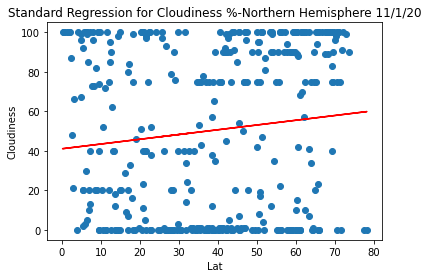

In [34]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")

# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Standard Regression for Cloudiness %-Northern Hemisphere 11/1/20")
plt.savefig("Images/lat-cloud-lin-reg-north.png")
plt.show()

When looking at northern hemisphere cloudiness compared to latitude it is interesting that the slope is a gentle upward slope sitting right about in the middle of the graph. It stands to reason that it is in the middle since there a proportionate number of plots at 0% and 100% cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

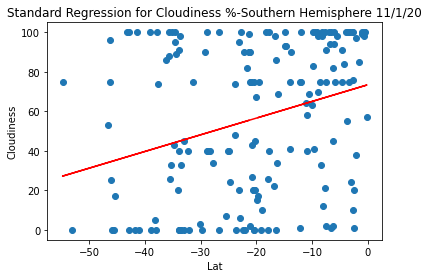

In [35]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")


# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Standard Regression for Cloudiness %-Southern Hemisphere 11/1/20")
plt.savefig("Images/lat-cloud-lin-reg-south.png")
plt.show()

When looking at southern hemisphere cloudiness compared to latitude it is interesting that the slope has a steeper upward slope than the northern hemisphere. Similar to the north there are a proportionate number of plots at 0% and 100% cloudiness, but the southerne hemisphere has less in between than the north which would point to the steeper slope.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

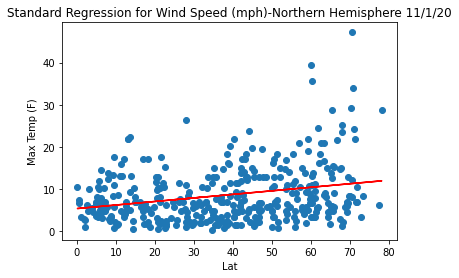

In [36]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")

# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Standard Regression for Wind Speed (mph)-Northern Hemisphere 11/1/20")
plt.savefig("Images/lat-wind-lin-reg-north.png")
plt.show()

When looking at northern hemisphere wind speed compared to latitude it is interesting that the slope is a gentle upward slope sitting closer to the bottom of the graph. When looking at the global weather you see that there is generally very little going on with regard to wind in the northern hemisphere so the slope is closer to the bottom and only has a a little slope upward.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

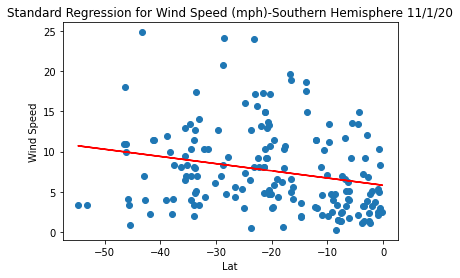

In [37]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")


# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Standard Regression for Wind Speed (mph)-Southern Hemisphere 11/1/20")
plt.savefig("Images/lat-wind-lin-reg-south.png")
plt.show()

When looking at southern hemisphere wind speed compared to latitude it is interesting that the slope is a gentle downward slope sitting closer to the middle of the graph. When looking at the global weather you see that the average wind speed is about 7.5 MPH for the southern hemisphere plots on this graph, which is approximately where the middle point of the slope lies.